In [1]:
using PyPlot
using WaveletScattering

Configuring Mocha...


 * CUDA       disabled by default
 * Native Ext disabled by default
Mocha configured, continue loading module...
DefaultBackend = Mocha.CPUBackend


In [61]:
ws = WaveletScattering
spec = ws.Spec1D(log2_size = 9, n_filters_per_octave = 4)
@time bank = ws.Bank1D(spec);

  0.001603 seconds (1.66 k allocations: 663.234 KB)


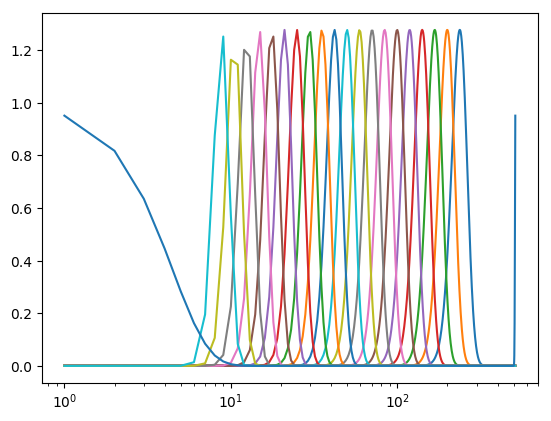

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32f07ed90>

In [80]:
N = 1 << spec.log2_size
halfN = N >> 1
ωs = (-halfN):(halfN-1)
for ψ in bank.ψs
    semilogx(fftshift(abs2(ψ[ωs])))
end
semilogx(fftshift(abs2(bank.ϕ[ωs])))

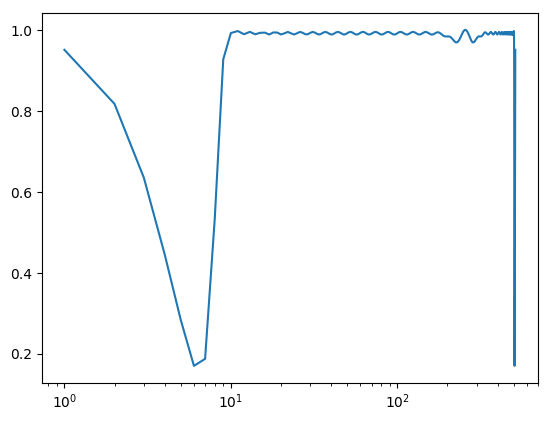

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32eebc910>

In [92]:
lp = renormalize!(bank.ϕ, bank.ψs, bank.spec)
semilogx(lp)

In [90]:
import ws: LineGroups, FourierDomain, FourierSymmetric1DFilter, AbstractFilter, AbstractSpec, littlewoodpaleyadd!, get_n_orientations, symmetrize!
function renormalize!{T<:Number,G<:LineGroups}(
        ϕ::FourierSymmetric1DFilter{T},
        ψs::Array{AbstractFilter{T,FourierDomain{1}},3},
        spec::AbstractSpec{T,FourierDomain{1},G})
    lp = zeros(real(T), 1<<spec.log2_size)
    littlewoodpaleyadd!(lp, ϕ)
    for idψ in eachindex(ψs[1, :, :]) littlewoodpaleyadd!(lp, ψs[idψ]); end
    get_n_orientations(spec.pointgroup)==1 && symmetrize!(lp)
    ψs .*= inv(sqrt(lp[1+end>>1]))
    return scale!(lp, inv(lp[1+end>>1]))
end

renormalize! (generic function with 1 method)